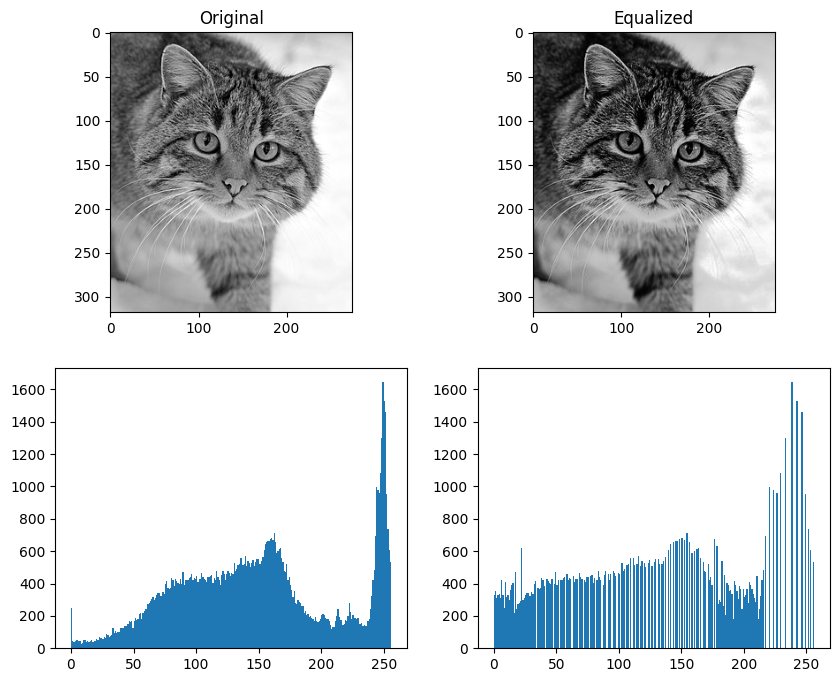

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sum_i(i, hist):
    return np.sum(hist[:i+1])

def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    lut = np.empty(256)

    for i in range(256):
        lut[i] = 255 * sum_i(i, hist) / sum(hist)

    equalized_image = lut[image]
    equalized_image = equalized_image.astype(np.uint8)

    return equalized_image

gray_image1 = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
result_image = histogram_equalization(gray_image1)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(gray_image1, cmap='gray')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Equalized')

plt.subplot(2, 2, 3)
plt.hist(gray_image1.ravel(), 256, [0, 256])

plt.subplot(2, 2, 4)
plt.hist(result_image.ravel(), 256, [0, 256])

plt.show()